In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# check for the missing values in the DF

s=df.isna().sum()
s[s>0]

Series([], dtype: int64)

#### Seperate X(Independant value) and Y (Dependant value)

PROFIT ~ OTHER VALUES

In [7]:
X = df.drop(columns=['PROFIT'])
Y = df[['PROFIT']]

In [8]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


#### Seperate cat and con valued from X

In [10]:
cat = list(X.columns[X.dtypes=='object'])
cat

['STATE']

In [11]:
con = list(X.columns[X.dtypes!='object'])
con

['RND', 'ADMIN', 'MKT']

#### Create Preprocessing Pipeline

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

### Create Num and Cat pipline

In [13]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                            ('scaler',StandardScaler())])

cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore'))])

pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])


In [14]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [15]:
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(handle_unknown='ignore'))])

In [16]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['RND', 'ADMIN', 'MKT']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['STATE'])])

#### Take column names (features) out 

In [17]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

##### Take columns name out (features)

In [18]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [19]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


#### train test split

In [20]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [21]:
xtest.shape

(10, 6)

In [22]:
xtrain.shape

(40, 6)

#### Create model

In [31]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2,min_samples_split=5,min_samples_leaf=7,criterion='squared_error')
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=7, min_samples_split=5)

#### Check for R2 score

In [32]:
# R2 score in training
model.score(xtrain,ytrain)

0.8626403588146891

In [33]:
# R2 scor in testing
model.score(xtest,ytest)

0.8524112129662642

#### Hyper parameter tunning

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
params = {'max_depth':[2,3,4,5,6,7,8,10,11,12],
          'min_samples_split':[2,3,4,5,6,7,8,9],
          'min_samples_leaf':[5,6,7,8,9],
          'criterion':['squared_error','absolute_error']}

In [44]:
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr,param_grid=params,cv=5,scoring='neg_root_mean_squared_error')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 10, 11, 12],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='neg_root_mean_squared_error')

In [45]:
gscv.best_params_

{'criterion': 'absolute_error',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [46]:
gscv.best_score_

-19207.56763914441

In [48]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(criterion='absolute_error', max_depth=3,
                      min_samples_leaf=5)

In [49]:
best_dtr.score(xtrain,ytrain)

0.9170132779190516

In [50]:
best_dtr.score(xtest,ytest)

0.9142766438713301

#### Predict test and train results

In [51]:
ypred_tr = best_dtr.predict(xtrain)
ypred_ts = best_dtr.predict(xtest)

In [52]:
ypred_tr[:5]

array([100471.115, 120625.445, 120625.445, 145190.675, 100471.115])

In [53]:
ytrain.head(5)

,PROFIT
30,99937.59
21,111313.02
19,122776.86
11,144259.40
22,110352.25


In [54]:
ypred_ts[:5]

array([145190.675,  79622.835,  49490.75 , 100471.115, 145190.675])

In [55]:
ytest.head(5)

,PROFIT
7,155752.60
44,65200.33
43,69758.98
25,107404.34
14,132602.65


#### Plotting regression tree

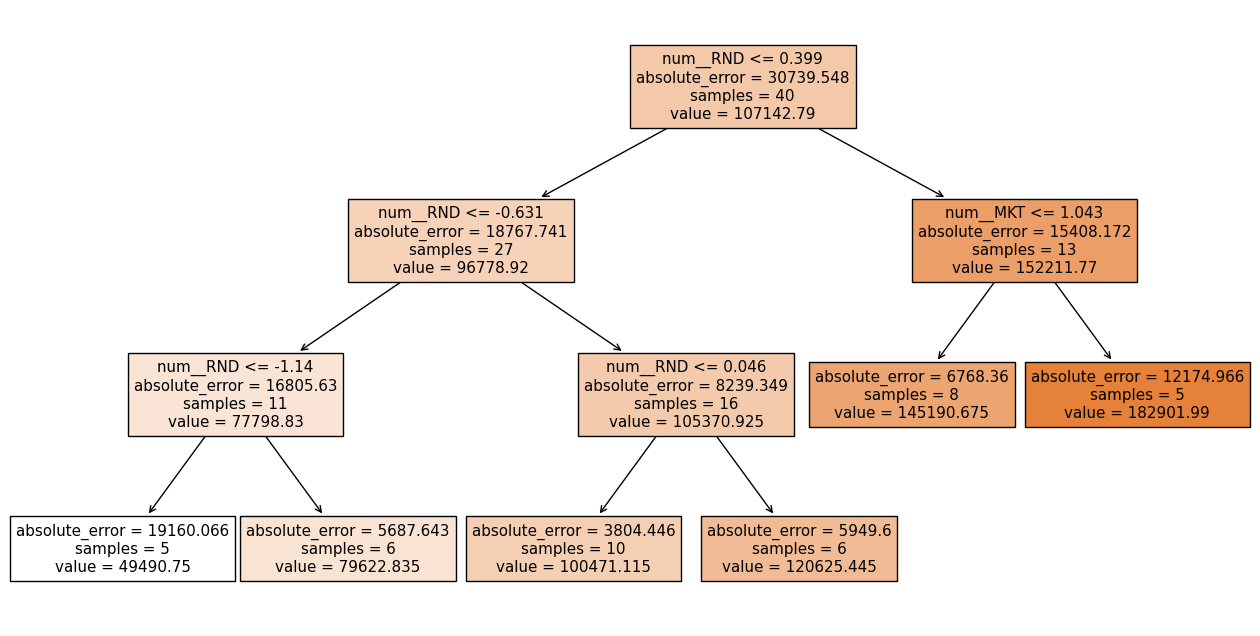

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(best_dtr,feature_names=list(xtrain.columns),filled=True)
plt.show()